![](http://www.ewdn.com/wp-content/uploads/sites/6/2017/02/logo-avito.png)

# More To Come. Stay Tuned. !!
If there are any suggestions/changes you would like to see in the Kernel please let me know :). Appreciate every ounce of help!

**This notebook will always be a work in progress**. Please leave any comments about further improvements to the notebook! Any feedback or constructive criticism is greatly appreciated!. **If you like it or it helps you , you can upvote and/or leave a comment :).**

I am using [Yandex Translate](https://translate.yandex.com/?lang=ru-en&text=Челябинск) for converting russian language to english language.


- <a href='#intro'>1. Introduction</a>  
- <a href='#rtd'>2. Retrieving the Data</a>
     - <a href='#ll'>2.1 Load libraries</a>
     - <a href='#rrtd'>2.2 Read the Data</a>
- <a href='#god'>3. Glimpse of Data</a>
     - <a href='#oot'>3.1 Overview of tables</a>
     - <a href='#sootd'>3.2 Statistical overview of the Data</a>
- <a href='#dp'>4. Data preparation</a>
     - <a href='#cfmd'> 4.1 Check for missing data</a>
- <a href='#de'>5. Data Exploration</a>
    - <a href='#hadodp'>5.1 Histogram and distribution of deal probability</a>
    - <a href='#hadoap'>5.2 Histogram and distribution of Ad price</a>
    - <a href='#dodar'>5.3 Distribution of differnet Ad regions</a>
    - <a href='#t'>5.4 Top 5</a> 
        - <a href='#ttat'>5.4.1 Top 5 Ad titles</a>
        - <a href='#ttac'>5.4.2 Top 5 Ad city</a>
        - <a href='#ttara'>5.4.3 Top 10 Ad regions</a>
        - <a href='#tttlcalm'>5.4.4 Top 10 Fine grain ad category as classified by Avito's ad mode</a>
        - <a href='#ttlcmsd'>5.4.5 Top 10 Top level ad category as classified by Avito's ad model</a>
    - <a href='#pvdpp'>5.5 Price V.S. Deal probability</a>
    - <a href='#5-6'>5.6 Deal probability V.S.  Price for regions</a>
    - <a href='#dout'>5.7 Distribution of user type</a>
    - <a href='#mdodadr'>5.8 Monthly distribution of Ad prices in different regions </a>
    - <a href='#dorpdp'>5.9 Distribution of regions, per deal probability</a>
    - <a href='#tkfad'>5.10 Top Keywords from Ad description</a>
    - <a href='#toapaa'>5.10 Time Series Analysis</a>
    - <a href='#5-11'>5.11 Ad sequential number for user V.S. deal probability</a>
    - <a href='#5-12'>5.12 Deal probability V.S. Ad sequential number for user for regions</a>
    - <a href='#5-13'>5.13 Number of words in description column</a>
    - <a href='#vdcgv'>5.14 Venn Diagrams(Common Features values in training and test data)</a>
    - <a href='#toapaa'>5.15 Time series Analysis</a>
        - <a href='#toadp'>5.15.1 Trend of Ad price</a>
        - <a href='#paetsd'>5.15.2 Price average every two days</a>
        - <a href='#paeed'>5.15.3 Price average every day</a>
        - <a href='#dapevtr'>5.15.4 deal probability average every two days</a>
        - <a href='#dapevtttr'>5.15.5 Deal probability average every  days</a>
        - <a href='#tnodawdjshhs'>5.15.6 Total number of days a Ad was dispalyed when it was posted on particular day</a>
        - <a href='#fodsbdir'>5.15.7  frequency and pattern of ad activation date in train and test data</a>
- <a href='#5-15'>6. Feature Engineering</a>    
    - <a href='#5-15-1'>6.1 Features created from activation_date </a>
    - <a href='#5-15-2'>6.2 Featrues created from Ad description</a>
    - <a href='#5-15-3'>6.3 Converting Categorical featues to numericals features</a>
    - <a href='#5-15-4'>6.4  Removing Unwanted features</a>
- <a href='#5-16'>7 Pearson Correlation of features</a>
- <a href='#5-17'>8 Feature importance via Gradient Boosting model</a>
- <a href='#5-18'>9 Decision Tree Visualisation</a>
- <a href='#bsc'>10. Brief summary and conclusion </a>

# <a id='intro'>1. Introduction</a>  

Avito, Russia’s largest classified advertisements website, is deeply familiar with this problem. Sellers on their platform sometimes feel frustrated with both too little demand (indicating something is wrong with the product or the product listing) or too much demand (indicating a hot item with a good description was underpriced).

In their fourth Kaggle competition, Avito is challenging you to predict demand for an online advertisement based on its full description (title, description, images, etc.), its context (geographically where it was posted, similar ads already posted) and historical demand for similar ads in similar contexts. With this information, Avito can inform sellers on how to best optimize their listing and provide some indication of how much interest they should realistically expect to receive.

# <a id='rtd'>2. Retrieving the Data</a>
## <a id='ll'>2.1 Load libraries</a>

In [9]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm

from sklearn import preprocessing
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# from nltk.corpus import stopwords
# from textblob import TextBlob
import datetime as dt
import warnings
import string
import time
# stop_words = []
# stop_words = list(set(stopwords.words('russian')))
warnings.filterwarnings('ignore')
# punctuation = string.punctuation

# Plotting Decision tree
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

# Venn diagram
from matplotlib_venn import venn2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [10]:
pwd

'/Users/alexmiao/Box Sync/Miscellaneous/Kaggle/20180529 - Avito Demand Prediction Challenge'

## <a id='rrtd'>2.2 Read the Data</a>

In [11]:
print("Reading Data......")
periods_test = pd.read_csv('/Users/alexmiao/Box Sync/Miscellaneous/Kaggle/20180529 - Avito Demand Prediction Challenge/periods_test.csv', parse_dates=["activation_date", "date_from", "date_to"])
periods_train = pd.read_csv('/Users/alexmiao/Box Sync/Miscellaneous/Kaggle/20180529 - Avito Demand Prediction Challenge/periods_train.csv', parse_dates=["activation_date", "date_from", "date_to"])
test = pd.read_csv('/Users/alexmiao/Box Sync/Miscellaneous/Kaggle/20180529 - Avito Demand Prediction Challenge/test.csv')
train = pd.read_csv('/Users/alexmiao/Box Sync/Miscellaneous/Kaggle/20180529 - Avito Demand Prediction Challenge/train.csv')
print("Reading Done....")
# train_active = pd.read_csv('../input/train_active.csv')
# test_active = pd.read_csv('../input/test_active.csv')

Reading Data......
Reading Done....


In [12]:
print("size of train data", train.shape)
print("size of test data", test.shape)
print("size of periods_train data", periods_train.shape)
print("size of periods_test data", periods_test.shape)

size of train data (1503424, 18)
size of test data (508438, 17)
size of periods_train data (16687412, 4)
size of periods_test data (13724922, 4)


# <a id='god'>3. Glimpse of Data</a>
## <a id='oot'>3.1 Overview of tables</a>

**train data**

In [13]:
train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


**test data**

In [14]:
test.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.0,4,2017-04-16,Private,NaN,NaN
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,Продам новый телевизор BBK 32 диагональ смарт...,15000.0,15,2017-04-17,Private,8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...,2960.0
3,8e348601fefc,5f1d5c3ce0da,Саратовская область,Саратов,Для дома и дачи,Бытовая техника,Для кухни,Вытяжки,NaN,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами....",4500.0,70,2017-04-17,Private,NaN,NaN
4,8bd2fe400b89,23e2d97bfc7f,Оренбургская область,Бузулук,Личные вещи,Товары для детей и игрушки,Детские коляски,NaN,NaN,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопрос...,4900.0,15,2017-04-15,Private,bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8f...,1002.0


**periods train data**

In [15]:
periods_train.head()

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28


**periods test data**

In [16]:
periods_test.head()

,item_id,activation_date,date_from,date_to
0,f3a62a713278,2017-03-13,2017-04-12,2017-04-12
1,045ec5dabe07,2017-04-03,2017-04-12,2017-04-18
2,801d15e12e25,2017-04-17,2017-04-17,2017-04-18
3,0a981789d4af,2017-03-23,2017-04-12,2017-04-18
4,cab2ed403350,2017-03-28,2017-04-12,2017-04-18


## <a id='sootd'>3.2 Statistical overview of the Data</a>

**Training Data some little info**

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null object
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: float64(3), int

**Little description of training data for numerical features**

In [18]:
train.describe()

,price,item_seq_number,image_top_1,deal_probability
count,1.418062e+06,1.503424e+06,1.390836e+06,1.503424e+06
mean,3.167081e+05,7.436740e+02,1.241932e+03,1.391306e-01
std,6.689154e+07,5.572522e+03,9.704641e+02,2.600785e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+02,9.000000e+00,4.250000e+02,0.000000e+00
50%,1.300000e+03,2.900000e+01,1.057000e+03,0.000000e+00
75%,7.000000e+03,8.800000e+01,2.217000e+03,1.508700e-01
max,7.950101e+10,2.044290e+05,3.066000e+03,1.000000e+00


**Little description of training data for categorical features**

In [19]:
train.describe(include=["O"])

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,activation_date,user_type,image
count,1503424,1503424,1503424,1503424,1503424,1503424,1441848,848882,640859,1503424,1387148,1503424,1503424,1390836
unique,1503424,771769,28,1733,9,47,371,271,1219,788377,1317102,21,3,1390836
top,81b1683f8442,45ba3f23bf25,Краснодарский край,Краснодар,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,Вторичка,Платье,В хорошем состоянии,2017-03-20,Private,292e301eb34db6ee2ce3eaf1007c93f3b4e9475de11b86...
freq,1,1080,141416,63638,697623,282753,226289,150450,50615,15550,2249,115190,1075706,1


# <a id='dp'>4. Data preparation</a>
 ## <a id='cfmd'> 4.1 Check for missing data</a>

**checking missing data in training data **

In [20]:
# checking missing data in training data 
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head(10)

,Total,Percent
param_3,862565,57.373369
param_2,654542,43.536753
description,116276,7.734079
image,112588,7.488772
image_top_1,112588,7.488772
price,85362,5.677839
param_1,61576,4.095718
category_name,0,0.000000
user_id,0,0.000000
region,0,0.000000


**checking missing data in periods training data **

In [21]:
# checking missing data in periods data 
total = periods_train.isnull().sum().sort_values(ascending = False)
percent = (periods_train.isnull().sum()/periods_train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
activation_date,5790,0.034697
date_to,0,0.000000
date_from,0,0.000000
item_id,0,0.000000


# <a id='de'>5. Data Exploration</a>

## <a id='hadodp'>5.1 Histogram and distribution of deal probability</a>

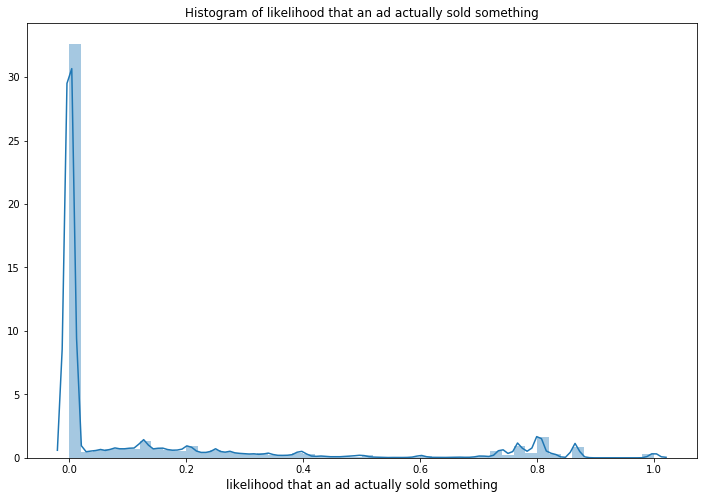

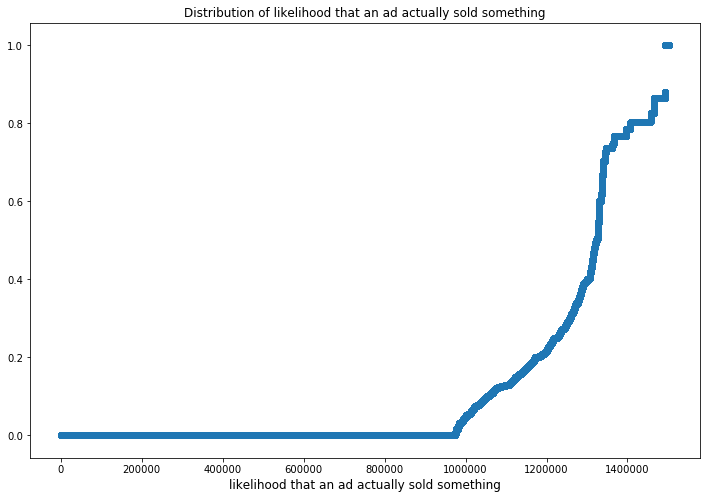

In [22]:
plt.figure(figsize = (12, 8))

sns.distplot(train['deal_probability'])
plt.xlabel('likelihood that an ad actually sold something', fontsize=12)
plt.title("Histogram of likelihood that an ad actually sold something")
plt.show() 
plt.figure(figsize = (12, 8))
plt.scatter(range(train.shape[0]), np.sort(train.deal_probability.values))
plt.xlabel('likelihood that an ad actually sold something', fontsize=12)
plt.title("Distribution of likelihood that an ad actually sold something")
plt.show()

## <a id='hadoap'>5.2 Histogram and distribution of Ad price</a>

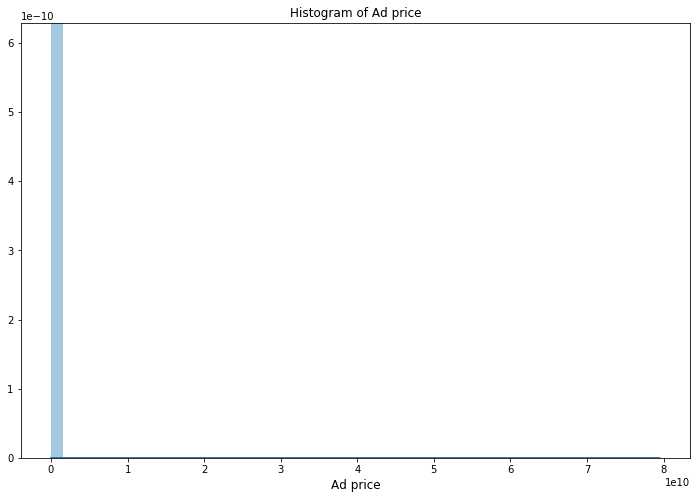

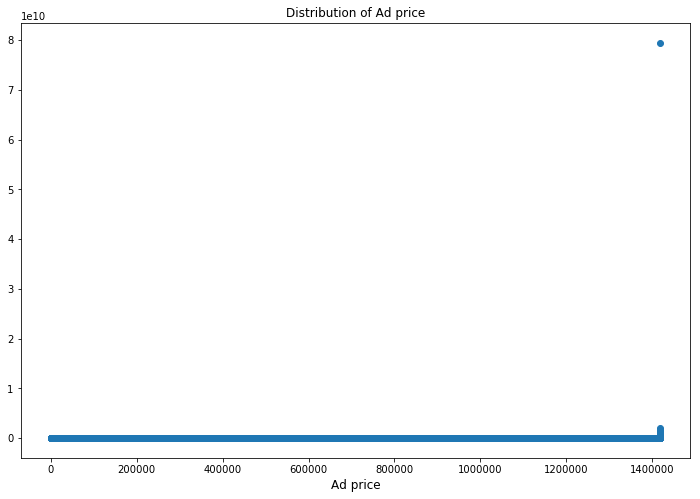

In [23]:
plt.figure(figsize = (12, 8))

sns.distplot(train['price'].dropna())
plt.xlabel('Ad price', fontsize=12)
plt.title("Histogram of Ad price")
plt.show() 
plt.figure(figsize = (12, 8))
plt.scatter(range(train.shape[0]), np.sort(train.price.values))
plt.xlabel('Ad price', fontsize=12)
plt.title("Distribution of Ad price")
plt.show()

In [24]:
train['deal_class'] = train['deal_probability'].apply(lambda x: ">=0.5" if x >=0.5 else "<0.5")
temp = train['deal_class'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Distribution of deal class')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

del train['deal_class']

* Approx 88 % training data having less than 0.5 deal probabilty. Remaining 12 % having probability more than or equal to 0.5.

In [25]:
from io import StringIO

conversion = StringIO("""
region,region_english
Свердловская область, Sverdlovsk oblast
Самарская область, Samara oblast
Ростовская область, Rostov oblast
Татарстан, Tatarstan
Волгоградская область, Volgograd oblast
Нижегородская область, Nizhny Novgorod oblast
Пермский край, Perm Krai
Оренбургская область, Orenburg oblast
Ханты-Мансийский АО, Khanty-Mansi Autonomous Okrug
Тюменская область, Tyumen oblast
Башкортостан, Bashkortostan
Краснодарский край, Krasnodar Krai
Новосибирская область, Novosibirsk oblast
Омская область, Omsk oblast
Белгородская область, Belgorod oblast
Челябинская область, Chelyabinsk oblast
Воронежская область, Voronezh oblast
Кемеровская область, Kemerovo oblast
Саратовская область, Saratov oblast
Владимирская область, Vladimir oblast
Калининградская область, Kaliningrad oblast
Красноярский край, Krasnoyarsk Krai
Ярославская область, Yaroslavl oblast
Удмуртия, Udmurtia
Алтайский край, Altai Krai
Иркутская область, Irkutsk oblast
Ставропольский край, Stavropol Krai
Тульская область, Tula oblast
""")

conversion = pd.read_csv(conversion)
train = pd.merge(train, conversion, how="left", on="region")


## <a id='dodar'>5.3 Distribution of differnet Ad regions</a>

In [26]:
temp = train['region_english'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Distribution of differnet Ad regions')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## <a id='t'>5.4 Top 5</a> 

## <a id='ttat'>5.4.1 Top 5 Ad titles</a>

In [27]:
temp = train["title"].value_counts().head(20)
print("Top 5 Ad titles :\n", temp.head(5))
print("Total Ad titles : ",len(train["title"]))
trace = go.Bar(
    x = temp.index,
    y = temp.values,
)
data = [trace]
layout = go.Layout(
    title = "Top Ad titles",
    xaxis=dict(
        title='Ad title',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Ad titles',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Top 5 Ad titles :
 Платье    15550
Туфли      6334
Куртка     6331
Пальто     5251
Джинсы     4758
Name: title, dtype: int64
Total Ad titles :  1503424


* ** Top 5 Ad titles are :**
  *  Платье(Dress)
  *  Туфли (Shoes) 
  *  Куртка(Jacket) 
  * Пальто (Coat) 
  * Джинсы(Jeans) 
   

## <a id='ttac'>5.4.2 Top 5 Ad city</a>

In [28]:
temp = train["city"].value_counts().head(20)
print('Top 5 Ad cities :\n', temp.head(5))
print("Total Ad cities : ",len(train["title"]))
trace = go.Bar(
    x = temp.index,
    y = temp.values,
)
data = [trace]
layout = go.Layout(
    title = "Top Ad city",
    xaxis=dict(
        title='Ad title name',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Ad cities',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Top 5 Ad cities :
 Краснодар          63638
Екатеринбург       63602
Новосибирск        56929
Ростов-на-Дону     52323
Нижний Новгород    52010
Name: city, dtype: int64
Total Ad cities :  1503424


* **Top 5 Ad cities :**
  * Краснодар (Krasnodar)         
  * Екатеринбург (Yekaterinburg)
  * Новосибирск (Novosibirsk) 
  * Ростов-на-Дону  (Rostov-on-don) 
  * Нижний Новгород  (Nizhny Novgorod) 

## <a id='ttara'>5.4.3 Top 5 Ad regions</a>

In [29]:
temp = train["region_english"].value_counts().head(20)
print('Top 5 Ad regions :\n',temp.head(5))
print("Total Ad regions : ",len(train["title"]))
trace = go.Bar(
    x = temp.index,
    y = temp.values,
)
data = [trace]
layout = go.Layout(
    title = "Top Ad regions",
    xaxis=dict(
        title='Ad region name',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Ad regions',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Top 5 Ad regions :
  Krasnodar Krai        141416
 Sverdlovsk oblast      94475
 Rostov oblast          89995
 Tatarstan              81284
 Chelyabinsk oblast     78339
Name: region_english, dtype: int64
Total Ad regions :  1503424


* ** Top 5 Ad regions :**
  * Krasnodar Krai
  * Sverdlovsk oblast  
  * Rostov oblast 
  * Tatarstan 
  * Chelyabinsk oblast 

## <a id='tttlcalm'>5.4.4 Top 5 Fine grain ad category as classified by Avito's ad mode</a>

In [30]:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-avito
conversion = StringIO("""
category_name,category_name_english
"Одежда, обувь, аксессуары","Clothing, shoes, accessories"
Детская одежда и обувь,Children's clothing and shoes
Товары для детей и игрушки,Children's products and toys
Квартиры,Apartments
Телефоны,Phones
Мебель и интерьер,Furniture and interior
Предложение услуг,Offer services
Автомобили,Cars
Ремонт и строительство,Repair and construction
Бытовая техника,Appliances
Товары для компьютера,Products for computer
"Дома, дачи, коттеджи","Houses, villas, cottages"
Красота и здоровье,Health and beauty
Аудио и видео,Audio and video
Спорт и отдых,Sports and recreation
Коллекционирование,Collecting
Оборудование для бизнеса,Equipment for business
Земельные участки,Land
Часы и украшения,Watches and jewelry
Книги и журналы,Books and magazines
Собаки,Dogs
"Игры, приставки и программы","Games, consoles and software"
Другие животные,Other animals
Велосипеды,Bikes
Ноутбуки,Laptops
Кошки,Cats
Грузовики и спецтехника,Trucks and buses
Посуда и товары для кухни,Tableware and goods for kitchen
Растения,Plants
Планшеты и электронные книги,Tablets and e-books
Товары для животных,Pet products
Комнаты,Room
Фототехника,Photo
Коммерческая недвижимость,Commercial property
Гаражи и машиноместа,Garages and Parking spaces
Музыкальные инструменты,Musical instruments
Оргтехника и расходники,Office equipment and consumables
Птицы,Birds
Продукты питания,Food
Мотоциклы и мототехника,Motorcycles and bikes
Настольные компьютеры,Desktop computers
Аквариум,Aquarium
Охота и рыбалка,Hunting and fishing
Билеты и путешествия,Tickets and travel
Водный транспорт,Water transport
Готовый бизнес,Ready business
Недвижимость за рубежом,Property abroad
""")

conversion = pd.read_csv(conversion)
train = pd.merge(train, conversion, on="category_name", how="left")

In [31]:
temp = train["category_name_english"].value_counts().head(20)
print("Top 5 Fine grain ad category as classified by Avito's ad mode : \n", temp.head(5))
print("Total Fine grain ad category as classified by Avito's ad mode : ",len(train["title"]))
trace = go.Bar(
    x = temp.index,
    y = temp.values,
)
data = [trace]
layout = go.Layout(
    title = "Top Fine grain ad category as classified by Avito's ad mode",
    xaxis=dict(
        title='Fine grain ad category as classified by Avitos ad mode',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Fine grain ad category',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Top 5 Fine grain ad category as classified by Avito's ad mode : 
 Clothing, shoes, accessories     282753
Children's clothing and shoes    270359
Children's products and toys      99747
Apartments                        83670
Phones                            65944
Name: category_name_english, dtype: int64
Total Fine grain ad category as classified by Avito's ad mode :  1503424


* **Top 5 Fine grain ad category as classified by Avito's ad mode :**
 * Clothing, shoes and accessories 
 * Children clothing and shoes 
 * Childrens product and toys  
 * Apartments 
 * Phones 

## <a id='ttlcmsd'>5.4.5 Top 5 Top level ad category as classified by Avito's ad model</a>

In [32]:
conversion = StringIO("""
parent_category_name,parent_category_name_english
Личные вещи,Personal belongings
Для дома и дачи,For the home and garden
Бытовая электроника,Consumer electronics
Недвижимость,Real estate
Хобби и отдых,Hobbies & leisure
Транспорт,Transport
Услуги,Services
Животные,Animals
Для бизнеса,For business
""")

conversion = pd.read_csv(conversion)
train = pd.merge(train, conversion, on="parent_category_name", how="left")

In [33]:
temp = train["parent_category_name_english"].value_counts()
print("Total Top level ad category as classified by Avito's ad model : ",len(train["title"]))
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title = "Top level ad category as classified by Avito's ad model",
    xaxis=dict(
        title='Top level ad category as classified by Avitos ad model',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Top level ad category in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Total Top level ad category as classified by Avito's ad model :  1503424


*** Top 5 Top level ad category as classified by Avito's ad model :**
* Personal belongings - 46 %
* For the home and garden - 12 %
* Consumer electronics - 12 %
* Real estate - 10 %
* Hobbies & leisure - 6 %

## <a id='pvdpp'>5.5 Price V.S. Deal probability</a>

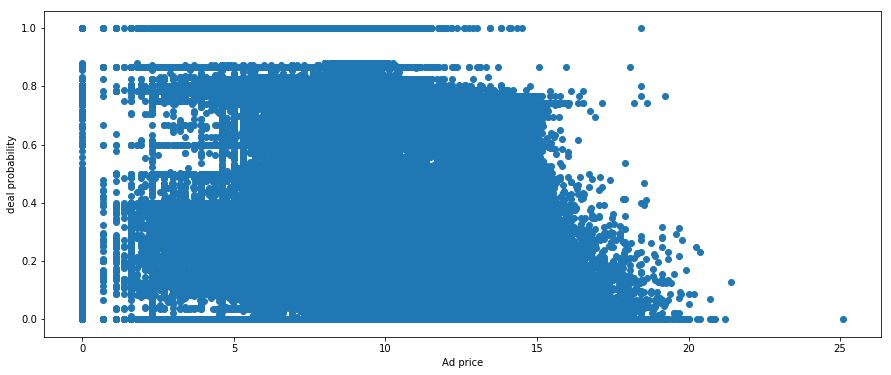

In [34]:
plt.figure(figsize=(15,6))
plt.scatter(np.log(train.price), train.deal_probability)
plt.xlabel('Ad price')
plt.ylabel('deal probability')
plt.show()

## <a id='5-6'>5.6 Deal probability V.S.  Price for regions</a>

In [35]:
populated_states = train[:100]

data = [go.Scatter(
    y = populated_states['deal_probability'],
    x = populated_states['price'],
    mode='markers+text',
    marker=dict(
        size= np.log(populated_states.price) - 2,
        color=populated_states['deal_probability'],
        colorscale='Portland',
        showscale=True
    ),
    text=populated_states['region_english'],
    textposition=["top center"]
)]
layout = go.Layout(
    title='Deal probability V.S.  Price for regions',
    xaxis= dict(title='Ad price'),
    yaxis=dict(title='deal probability')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## <a id='dout'>5.7 Distribution of user type</a>

In [36]:
temp = train['user_type'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Distribution of user type')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

* **Distribution of user types :**
  * Private users constitutes 71.6 % data
  * Comapny users constitutes 23.1 % data
  * Shop users constitutes 5.35 % data

## <a id='mdodadr'>5.8 Monthly distribution of Ad prices in different regions </a>

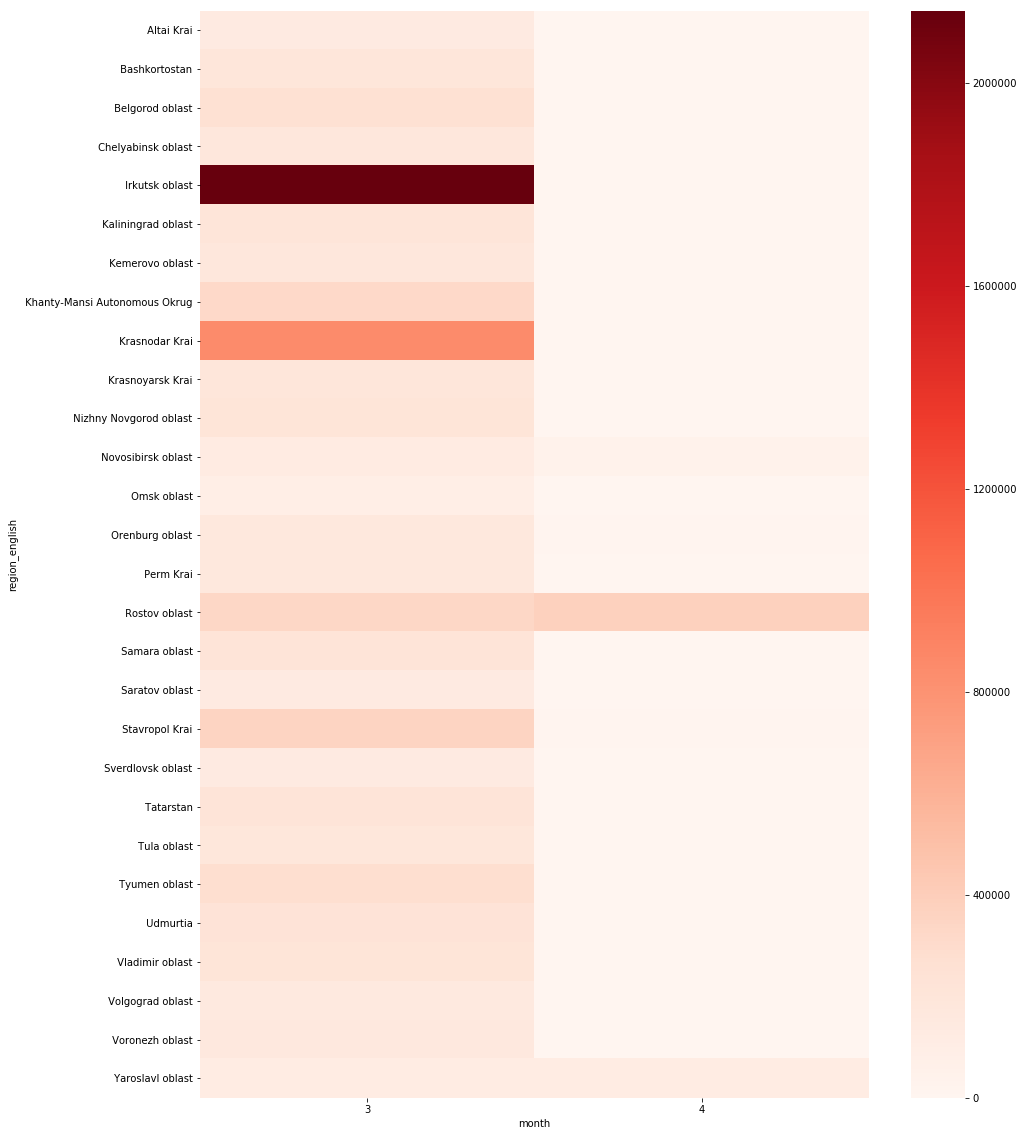

In [37]:
train['activation_date'] = pd.to_datetime(train['activation_date'])
train['month'] = train.activation_date.dt.month
pr = train.groupby(['region_english', 'month'])['price'].mean().unstack()
#pr = pr.sort_values([12], ascending=False)
f, ax = plt.subplots(figsize=(15, 20)) 
pr = pr.fillna(0)
temp = sns.heatmap(pr, cmap='Reds')
plt.show()

* Highest Ad prices is in **Irkutsk oblast** region followed by **Krasnodar Krai** region.

## <a id='dorpdp'>5.9 Distribution of regions, per deal probability</a>

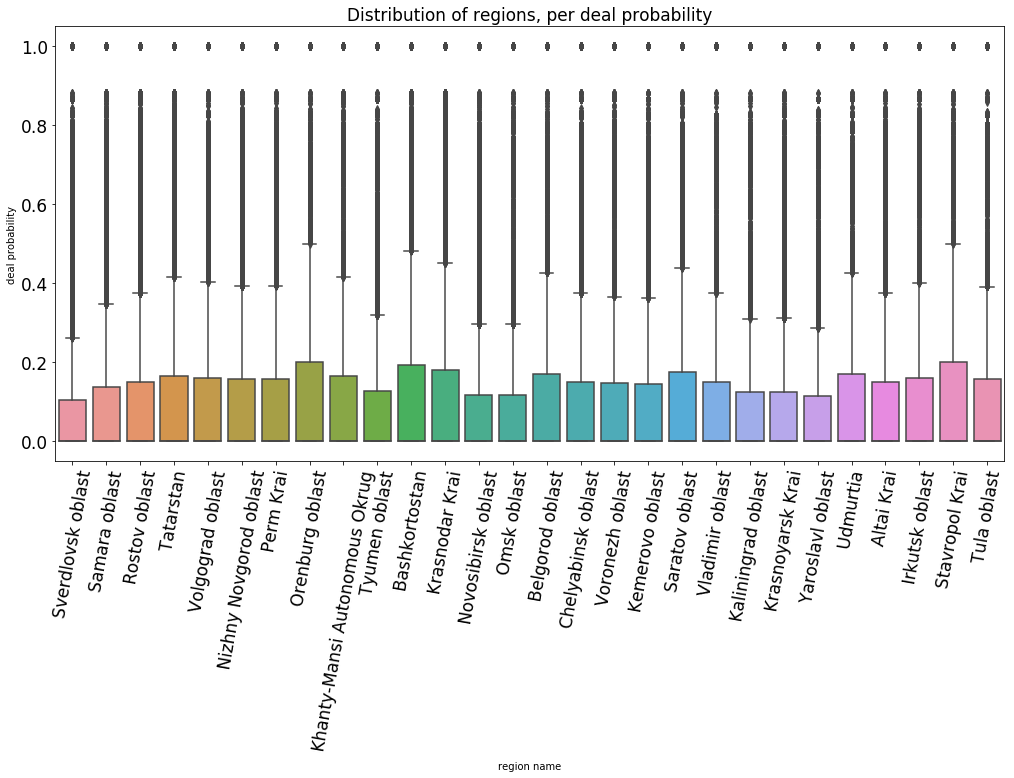

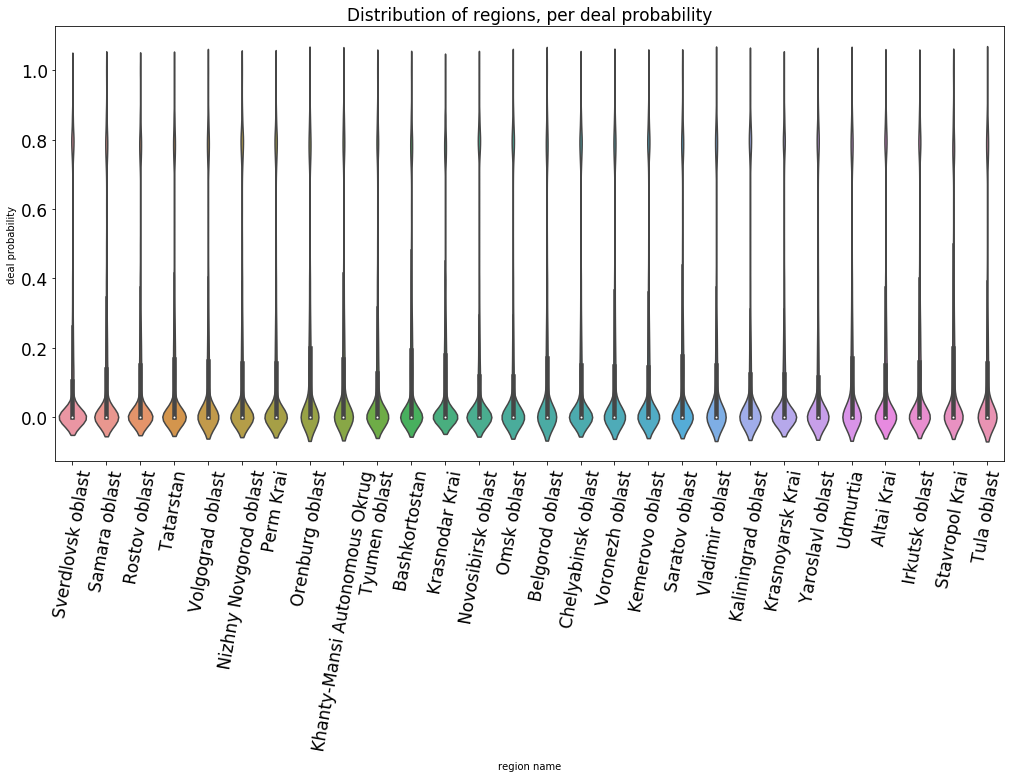

In [38]:
plt.figure(figsize=(17,8))
boxplot = sns.boxplot(x="region_english", y="deal_probability", data=train)
boxplot.set(xlabel='', ylabel='')
plt.title('Distribution of regions, per deal probability', fontsize=17)
plt.xticks(rotation=80, fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('region name')
plt.ylabel('deal probability')
plt.show()

_, ax = plt.subplots(figsize=(17, 8))
sns.violinplot(ax=ax, x="region_english", y="deal_probability", data=train)
plt.title('Distribution of regions, per deal probability', fontsize=17)
plt.xticks(rotation=80, fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('region name')
plt.ylabel('deal probability')
plt.show()

## <a id='tkfad'>5.10 Top Keywords from Ad description</a>

In [40]:
# from wordcloud import WordCloud, STOPWORDS
# names = test["description"][~pd.isnull(test["description"])]
# #print(names)
# wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
# plt.figure(figsize=(15,8))
# plt.imshow(wordcloud)
# plt.title("Wordcloud for Ad description", fontsize=35)
# plt.axis("off")
# plt.show() 

## <a id='5-11'>5.11 Ad sequential number for user V.S. deal probability</a>

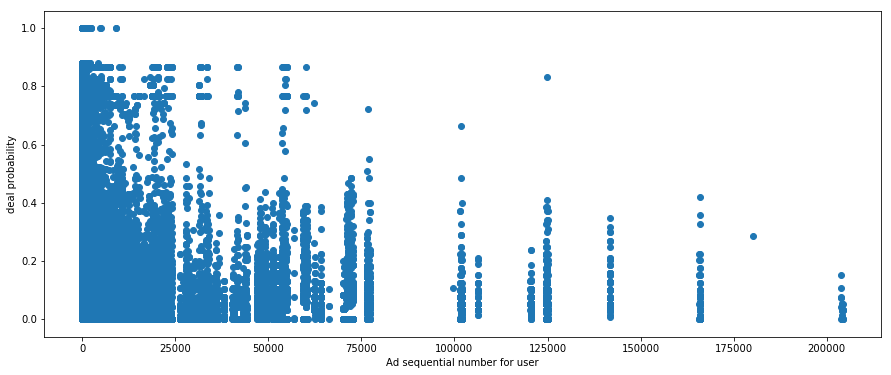

In [41]:
plt.figure(figsize=(15,6))
plt.scatter(train.item_seq_number, train.deal_probability)
plt.xlabel('Ad sequential number for user')
plt.ylabel('deal probability')
plt.show()

## <a id='5-12'>5.12 Deal probability V.S. Ad sequential number for user for regions</a>

In [42]:
populated_regions = train[:50]

data = [go.Scatter(
    y = populated_regions['deal_probability'],
    x = populated_regions['item_seq_number'],
    mode='markers+text',
    marker=dict(
        size= np.log(populated_regions.price) - 2,
        color=populated_regions['deal_probability'],
        colorscale='Portland',
        showscale=True
    ),
    text=populated_regions['region_english'],
    textposition=["top center"]
)]
layout = go.Layout(
    title='Deal probability V.S. Ad sequential number for user for regions',
    xaxis= dict(title='Ad sequential number for user'),
    yaxis=dict(title='deal probability')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## <a id='5-13'>5.13 Number of words in description column</a>

In [43]:
train["description"].fillna("NA", inplace=True)
train["desc_numOfWords"] = train["description"].apply(lambda x: len(x.split()))
temp = train["desc_numOfWords"].value_counts().head(80)
trace = go.Bar(
    x = temp.index,
    y = temp.values,
)
data = [trace]
layout = go.Layout(
    title = "Number of words in description column",
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
del train["desc_numOfWords"]

## <a id='vdcgv'>5.14 Venn Diagram(Common Features values in training and test data)</a>

* **A Venn diagram uses overlapping circles or other shapes to illustrate the logical relationships between two or more sets of items. Often, they serve to graphically organize things, highlighting how the items are similar and different.**

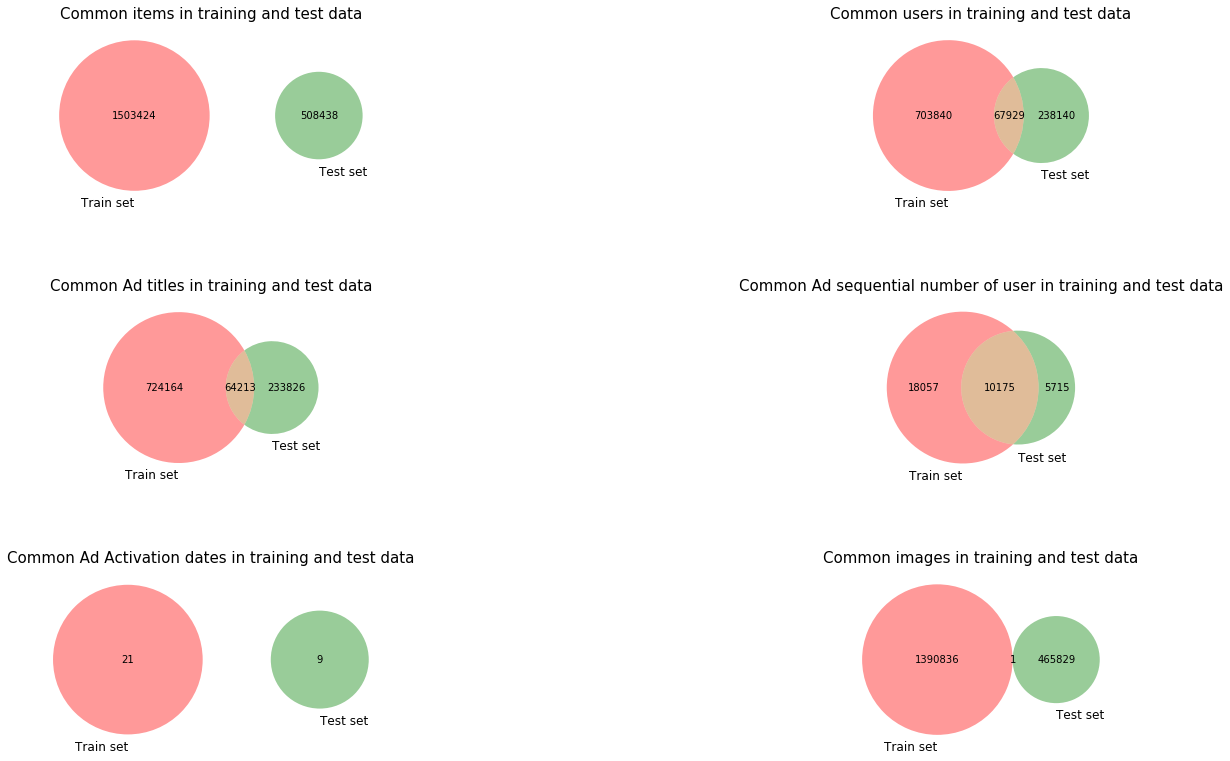

In [44]:
plt.figure(figsize=(23,13))

plt.subplot(321)
venn2([set(train.item_id.unique()), set(test.item_id.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common items in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(322)
venn2([set(train.user_id.unique()), set(test.user_id.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common users in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(323)
venn2([set(train.title.unique()), set(test.title.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common Ad titles in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(324)
venn2([set(train.item_seq_number.unique()), set(test.item_seq_number.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common Ad sequential number of user in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(325)
venn2([set(train.activation_date.unique()), set(test.activation_date.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common Ad Activation dates in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(326)
venn2([set(train.image.unique()), set(test.image.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common images in training and test data", fontsize=15)

plt.subplots_adjust(wspace = 0.5, hspace = 0.5,
                    top = 0.9)
plt.show()

* **Common items in training and test data :** 0
* **Common users in training and test data :** Approx. 68k
* **CommonAd titles in training and test data :** Approx. 64K
* **CommonAd sequential number of users in training and test data :** Approx. 10k
* **CommonAd activation dates in training and test data :** 0
* **Common images in training and test data :** 1

 ## <a id='toapaa'>5.15 Time series Analysis</a>

## <a id='toadp'>5.15.1 Trend of Ad price</a>

In [47]:
train.posted_time = pd.to_datetime(train['activation_date'])
train.index = pd.to_datetime(train['activation_date'])
plt.figure(figsize = (12, 8))
ax = train['price'].resample('w').sum().plot()
#ax = kiva_loans_data['funded_amount'].resample('w').sum().plot()
ax.set_ylabel('Price')
ax.set_xlabel('day-month')
ax.set_xlim((pd.to_datetime(train['activation_date'].min()), 
             pd.to_datetime(train['activation_date'].max())))
ax.legend(["Ad Price"])
plt.title('Trend of Ad price')

In [48]:
df = pd.read_csv('/Users/alexmiao/Box Sync/Miscellaneous/Kaggle/20180529 - Avito Demand Prediction Challenge/train.csv').set_index('activation_date')
df.index = pd.to_datetime(df.index)
#df.head()

In [49]:
df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,user_type,image,image_top_1,deal_probability
activation_date,,,,,,,,,,,,,,,,,
2017-03-28,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
2017-03-26,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2017-03-20,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
2017-03-25,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
2017-03-16,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


## <a id='paetsd'>5.15.2 Price average every two days</a>

In [50]:
df["price"].resample("2D").apply([np.mean]).plot()
plt.title("Price average every two days")
plt.ylabel("Price")

## <a id='paeed'>5.15.3 Price average every day</a>

In [51]:
df["price"].resample("D").apply([np.mean]).plot()
plt.title("Price average every day")
plt.ylabel("Price")

## <a id='dapevtr'>5.15.4 Deal probability average every two days</a>

In [52]:
df["deal_probability"].resample("2D").apply([np.mean]).plot()
plt.title("deal probability average every two days")
plt.ylabel("deal probability")

## <a id='dapevtttr'>5.15.5 Deal probability average every  days</a>

In [53]:
df["deal_probability"].resample("D").apply([np.mean]).plot()
plt.title("deal probability average every day")
plt.ylabel("deal probability")

## <a id='tnodawdjshhs'>5.15.6 Total number of days a Ad was dispalyed when it was posted on particular day</a>

In [54]:
periods_train['total_days'] = periods_train['date_to'] - periods_train['date_from']
periods_test['total_days'] = periods_test['date_to'] - periods_test['date_from']

In [55]:
periods_train.head()

,item_id,activation_date,date_from,date_to,total_days
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16,1 days
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18,3 days
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28,13 days
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28,9 days
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28,13 days


In [56]:
periods_train['total_days_value'] = periods_train['total_days'].dt.days
#periods_train['total_days'], _ = zip(*periods_train['total_days'].map(lambda x: x.split(' ')))

In [57]:
periods_train.head()

,item_id,activation_date,date_from,date_to,total_days,total_days_value
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16,1 days,1
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18,3 days,3
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28,13 days,13
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28,9 days,9
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28,13 days,13


In [58]:
#df = periods_train.set_index('activation_date')
periods_train.index = pd.to_datetime(periods_train['activation_date'])
plt.figure(figsize = (12, 8))
ax = periods_train['total_days_value'].resample('w').sum().plot()
#ax = kiva_loans_data['funded_amount'].resample('w').sum().plot()
ax.set_ylabel('Total days')
ax.set_xlabel('day-month')
ax.set_xlim((pd.to_datetime(periods_train['activation_date'].min()), 
             pd.to_datetime(periods_train['activation_date'].max())))
ax.legend(["Total number of days"])
plt.title('Total number of days a Ad was dispalyed when it was posted on particular day')

## <a id='fodsbdir'>5.15.7  frequency and pattern of ad activation date in train and test data</a>


In [59]:
temp = train["activation_date"].value_counts()
temp1 = test["activation_date"].value_counts()
trace0 = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    name = 'Ad activation dates in training data'
)
trace1 = go.Bar(
    x = temp1.index,
    y = (temp1 / temp1.sum())*100,
    name = 'Ad activation dates in test data'
)
data = [trace0, trace1]
layout = go.Layout(
    title = "frequency and pattern of ad activation date in train and test data",
    xaxis=dict(
        title='Ad Activation Date',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='frequency in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

* Most Ad activation date range is from 15 march 2017 to 28 March 2017 in training data and in test data the range is 12 April 2017 to 19 April 2017

# <a id='5-15'>6. Feature Engineering</a>

## <a id='5-15-1'>6.1 Features created from activation_date </a>

**Total 4 features created from activation_date :**

 - month
 - weekday
 - month_day
 - year_day

In [60]:
train['activation_date'] = pd.to_datetime(train['activation_date'])
test['activation_date'] = pd.to_datetime(test['activation_date'])

# ***** Train data *******
train["month"] = train["activation_date"].dt.month
train['weekday'] = train['activation_date'].dt.weekday
train["month_Day"] = train['activation_date'].dt.day
train["year_Day"] = train['activation_date'].dt.dayofyear

# ***** Test data *******
test["month"] = test["activation_date"].dt.month
test['weekday'] = test['activation_date'].dt.weekday
test["month_Day"] = test['activation_date'].dt.day
test["year_Day"] = test['activation_date'].dt.dayofyear 


## <a id='5-15-2'>6.2 Featrues created from Ad description</a>

Here we created total  features :
* **char_count**
* **word_count**
* **word_density**
* **punctuation_count**
* **title_word_count**
* **upper_case_word_count**
* **stopword_count**

In [62]:
# start_time=time.time()

# # *******train data *********
# #train['d_length'] = train['description'].apply(lambda x: len(str(x))) 
# train['char_count'] = train['description'].apply(len)
# train['word_count'] = train['description'].apply(lambda x: len(x.split()))
# train['word_density'] = train['char_count'] / (train['word_count']+1)
# train['punctuation_count'] = train['description'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
# train['title_word_count'] = train['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
# train['upper_case_word_count'] = train['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
# train['stopword_count'] = train['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop_words]))

# # *******test data *********
# #test['d_length'] = test['description'].apply(lambda x: len(str(x))) 
# test['char_count'] = test['description'].apply(len)
# test['word_count'] = test['description'].apply(lambda x: len(x.split()))
# test['word_density'] = test['char_count'] / (test['word_count']+1)
# test['punctuation_count'] = test['description'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
# test['title_word_count'] = test['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
# test['upper_case_word_count'] = test['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
# test['stopword_count'] = test['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop_words]))

# end_time=time.time()
# print("total time in the cuurent cell ",end_time-start_time,"s")

## <a id='5-15-3'>6.3 Converting Categorical featues to numericals features</a>

**Categorical variables are :**
   - region
   - city
   - parent_category_name
   - category_name
   - user_type
   - param_1
   - param_2
   - param_3

In [63]:
# Label encode the categorical variables
cat_vars = ["region", "city", "parent_category_name", "category_name", "user_type", "param_1", "param_2", "param_3"]
for col in cat_vars:
    lb = preprocessing.LabelEncoder()
    lb.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lb.transform(list(train[col].values.astype('str')))
    test[col] = lb.transform(list(test[col].values.astype('str')))

## <a id='5-15-4'>6.4  Removing Unwanted features</a>

- item_id
- user_id
- title
- description
- activation_date
- image
- region_en
- parent_category_name_en
- category_name_en
- deal_probability

In [64]:
# Target and ID variables 
yt = train["deal_probability"].values
test_id = test["item_id"].values

cols_to_drop = ["item_id", "user_id", "title", "description", "activation_date", "image"]
train_df = train.drop(cols_to_drop + ["region_english", "parent_category_name_english", "category_name_english", "deal_probability"], axis=1)


# <a id='5-16'>7. Pearson Correlation of features</a>

In [65]:
data = [
    go.Heatmap(
        z= train_df.corr().values,
        x=train_df.columns.values,
        y=train_df.columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

# <a id='5-17'>8. Feature importance via Gradient Boosting model</a>

In [66]:
start_time=time.time()

train_df.fillna(-1, inplace = True)
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(train_df, yt)
features = train_df.columns.values

end_time=time.time()
print("total time in the cuurent cell ",end_time-start_time,"s")

total time in the cuurent cell  227.79251098632812 s


In [67]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# <a id='5-18'>9. Decision Tree Visualisation</a>

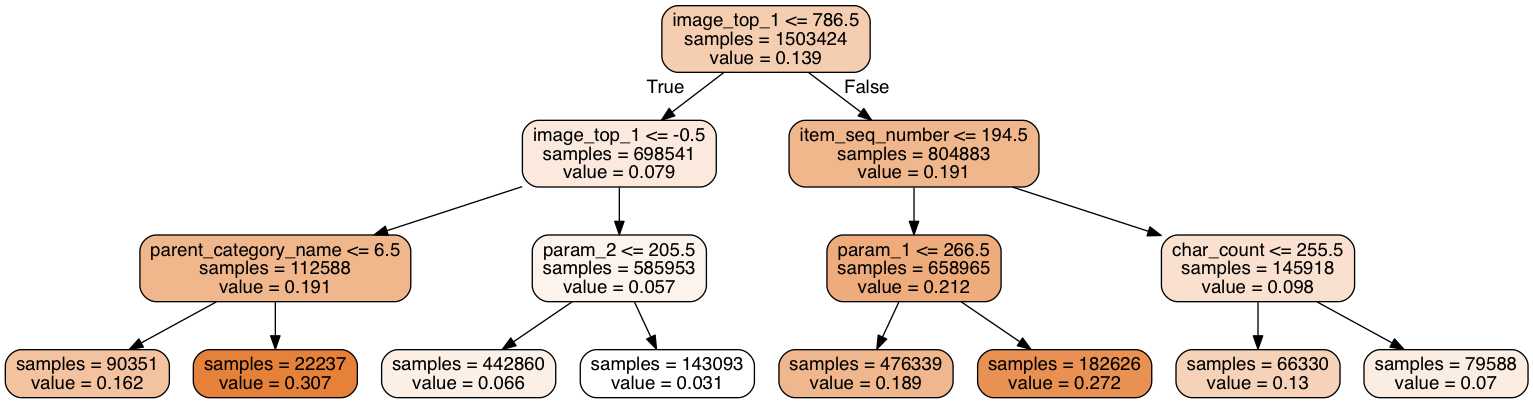

In [68]:
decision_tree = tree.DecisionTreeRegressor(max_depth = 3)
decision_tree.fit(train_df, yt)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = train_df.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png",)

# <a id='bsc'>10. Brief summary and conclusion :</a>




* Approx 88 % training data having less than 0.5 deal probabilty. Remaining 12 % having probability more than or equal to 0.5.
* ** Top 5 Ad titles are :**
  *  Платье(Dress)
  *  Туфли (Shoes) 
  *  Куртка(Jacket) 
  * Пальто (Coat) 
  * Джинсы(Jeans) 
* **Top 5 Ad cities :**
  * Краснодар (Krasnodar)         
  * Екатеринбург (Yekaterinburg)
  * Новосибирск (Novosibirsk) 
  * Ростов-на-Дону  (Rostov-on-don) 
  * Нижний Новгород  (Nizhny Novgorod) 
* ** Top 5 Ad regions :**
  * Krasnodar Krai
  * Sverdlovsk oblast  
  * Rostov oblast 
  * Tatarstan 
  * Chelyabinsk oblast 
* **Top 5 Fine grain ad category as classified by Avito's ad mode :**
  * Clothing, shoes and accessories 
  * Children clothing and shoes 
  * Childrens product and toys  
  * Apartments 
  * Phones 
* ** Top 5 Top level ad category as classified by Avito's ad model :**
   * Personal belongings - 46 %
   * For the home and garden - 12 %
   * Consumer electronics - 12 %
   * Real estate - 10 %
   * Hobbies & leisure - 6 %
* **Distribution of user types :**
  * Private users constitutes 71.6 % data
  * Comapny users constitutes 23.1 % data
  * Shop users constitutes 5.35 % data
* Common Features values in training and test data : 
   * **Common items in training and test data :** 0
   * **Common users in training and test data :** Approx. 68k
   * **CommonAd titles in training and test data :** Approx. 64K
   * **CommonAd sequential number of users in training and test data :** Approx. 10k
   * **CommonAd activation dates in training and test data :** 0
   * **Common images in training and test data :** 1
* Highest Ad prices is in **Irkutsk oblast** region followed by **Krasnodar Krai** region.  
* Most Ad activation date range is from 15 march 2017 to 28 March 2017 in training data and in test data the range is 12 April 2017 to 19 April 2017

## This is only a brief summary if want more details please go through my Notebook.

# More to come. Stayed Tuned !!